## Classification with Neural Network using electricity data

This data was collected from the Australian New South Wales Electricity Market.

In this market, prices are not fixed and are affected by demand and supply of the market. 

They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.
The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998.
Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day.

Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. 

The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends).

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [32]:
Df = pd.read_csv('electricity-normalized.csv')

In [35]:
Df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [36]:
Df['class'] = Df['class'].apply(lambda X: 1 if X=='UP' else 0) ##Convert class into 1 and 0

In [37]:
Df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0


In [40]:
Df.shape

(45312, 9)

In [39]:
X_Df = Df.drop(['class'], axis = 1)
y_Df = Df['class']

In [43]:
y_Df.shape, X_Df.shape

((45312,), (45312, 8))

In [113]:
#240/(2*(X_Df.shape[1]+1))

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_Df, y_Df, test_size=0.2, random_state=42)

In [91]:
#import library
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [114]:
model = Sequential()
n_cols = X_Df.shape[1]
target = to_categorical(y_train)
model.add(Dense(32, input_dim = 8, kernel_initializer='normal',  activation ='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [125]:
history = model.fit(X_train, y_train, epochs=200, batch_size=40, verbose=1, validation_split=0.2)
history

Train on 28999 samples, validate on 7250 samples
Epoch 1/200
28999/28999 [==============================] - 2s 59us/step - loss: 0.4063 - accuracy: 0.8158 - val_loss: 0.4086 - val_accuracy: 0.8116
Epoch 2/200
28999/28999 [==============================] - 2s 59us/step - loss: 0.4052 - accuracy: 0.8157 - val_loss: 0.4011 - val_accuracy: 0.8141
Epoch 3/200
28999/28999 [==============================] - 2s 60us/step - loss: 0.4067 - accuracy: 0.8158 - val_loss: 0.4057 - val_accuracy: 0.8160
Epoch 4/200
28999/28999 [==============================] - 2s 60us/step - loss: 0.4041 - accuracy: 0.8154 - val_loss: 0.4110 - val_accuracy: 0.8145
Epoch 5/200
28999/28999 [==============================] - 2s 56us/step - loss: 0.4058 - accuracy: 0.8156 - val_loss: 0.3995 - val_accuracy: 0.8167
Epoch 6/200
28999/28999 [==============================] - 2s 55us/step - loss: 0.4048 - accuracy: 0.8166 - val_loss: 0.4165 - val_accuracy: 0.8095
Epoch 7/200
28999/28999 [==============================] - 2s 5

In [95]:
#history = model.fit(X_train, y_train, epochs=200, batch_size=40,  verbose=1, validation_split=0.2)
#history

In [126]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

9063/9063 [==============================] - 0s 32us/step
Test accuracy: 0.8182721138000488


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


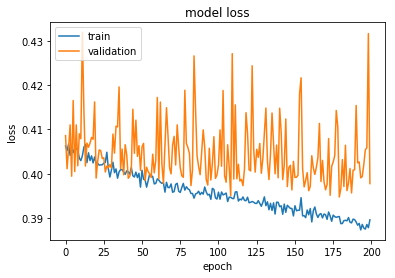

In [129]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [130]:
predictions = model.predict(X_test)
predictions_y = (predictions>0.5)

In [131]:
predictions_y

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm = confusion_matrix(y_test, predictions_y)
cm

array([[4440,  751],
       [ 896, 2976]])

In [133]:
score = accuracy_score(y_test, predictions_y)
score

0.8182720953326713